# Employee Performance Analysis and Prediction

## 1. Introduction

### Overview
This project aims to analyze and predict employee performance scores using a dataset containing key information about employees. By leveraging machine learning models, the goal is to identify patterns and provide actionable insights for HR and productivity improvement.

### Objective
- To preprocess and explore the dataset.
- To build a robust predictive model for performance scores.
- To deploy the model as an interactive Streamlit app.


## 2. Data Preprocessing
Steps:
1. Load the dataset.
2. Handle missing values.
3. Encode categorical variables.
4. Normalize numerical features.
5. Detect and treat outliers.


In [5]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC

In [6]:
# Load the dataset
data_path = "../data/raw/employee-performance-data.csv"
data = pd.read_csv(data_path)


C:\Users\yakupzengin\AppData\Local\Temp\ipykernel_1292\4089479290.py:3: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_path)


In [7]:
data.head()

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null  int64  
 13  

In [9]:
data.drop(columns=["Employee_ID","Hire_Date","Work_Hours_Per_Week","Sick_Days","Remote_Work_Frequency","Team_Size","Training_Hours","Resigned"],inplace=True)

In [10]:
data

,Department,Gender,Age,Job_Title,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Projects_Handled,Overtime_Hours,Promotions,Employee_Satisfaction_Score
0,IT,Male,55,Specialist,2,High School,5,6750.0,32,22,0,2.63
1,Finance,Male,29,Developer,0,High School,5,7500.0,34,13,2,1.72
2,Finance,Male,55,Specialist,8,High School,3,5850.0,27,6,0,3.17
3,Customer Support,Female,48,Analyst,7,Bachelor,2,4800.0,10,28,1,1.86
4,Engineering,Female,36,Analyst,3,Bachelor,2,4800.0,11,29,1,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Finance,Male,27,Technician,1,Bachelor,4,4900.0,46,5,2,1.28
99996,IT,Female,36,Consultant,6,Master,5,8250.0,35,7,1,3.48
99997,Operations,Male,53,Analyst,8,High School,2,4800.0,13,6,1,2.60
99998,HR,Female,22,Consultant,9,High School,5,8250.0,43,10,1,3.10


In [11]:
## Handle missing values
# Checking for missing values
missing_values = data.isnull().sum()
print("Missing values per column:")
missing_values

Missing values per column:


Department                     0
Gender                         0
Age                            0
Job_Title                      0
Years_At_Company               0
Education_Level                0
Performance_Score              0
Monthly_Salary                 0
Projects_Handled               0
Overtime_Hours                 0
Promotions                     0
Employee_Satisfaction_Score    0
dtype: int64

In [12]:
## Handle duplicated values
# Checking for duplicated values
data.duplicated().sum()

0

In [13]:
print("Data preprocessing complete.")

Data preprocessing complete.


## 3. Exploratory Data Analysis (EDA)
Steps:
1. Visualize key demographics.
2. Analyze the distribution of performance scores.
3. Correlation analysis.

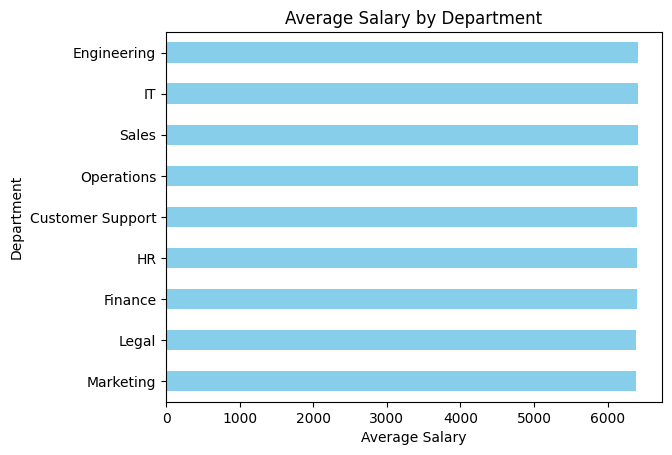

In [14]:
data.groupby("Department")["Monthly_Salary"].mean().sort_values(ascending=True).plot(kind="barh",color="skyblue")
plt.title("Average Salary by Department")
plt.xlabel("Average Salary")
plt.ylabel("Department")
plt.show()


In [15]:
data.groupby("Department")["Monthly_Salary"].mean().sort_values

<bound method Series.sort_values of Department
Customer Support    6403.881792
Engineering         6417.246258
Finance             6398.575893
HR                  6400.355839
IT                  6414.598868
Legal               6391.275409
Marketing           6377.857525
Operations          6412.306592
Sales               6413.154109
Name: Monthly_Salary, dtype: float64>

In [16]:
data.head(5)

,Department,Gender,Age,Job_Title,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Projects_Handled,Overtime_Hours,Promotions,Employee_Satisfaction_Score
0,IT,Male,55,Specialist,2,High School,5,6750.0,32,22,0,2.63
1,Finance,Male,29,Developer,0,High School,5,7500.0,34,13,2,1.72
2,Finance,Male,55,Specialist,8,High School,3,5850.0,27,6,0,3.17
3,Customer Support,Female,48,Analyst,7,Bachelor,2,4800.0,10,28,1,1.86
4,Engineering,Female,36,Analyst,3,Bachelor,2,4800.0,11,29,1,1.25


In [17]:
data["Gender"].value_counts()

Gender
Male      48031
Female    48001
Other      3968
Name: count, dtype: int64

In [18]:
# List of numeric columns for analysis
numeric_columns = ["Monthly_Salary", "Projects_Handled", "Overtime_Hours", "Promotions", "Employee_Satisfaction_Score", "Years_At_Company"]

# Iterate over columns to get the mean values
for column in numeric_columns:
    print(f"--- Analysis for {column} ---")
    mean_values = data.groupby("Department")[column].mean().sort_values(ascending=False)
    print(mean_values)
    print("----")



--- Analysis for Monthly_Salary ---
Department
Engineering         6417.246258
IT                  6414.598868
Sales               6413.154109
Operations          6412.306592
Customer Support    6403.881792
HR                  6400.355839
Finance             6398.575893
Legal               6391.275409
Marketing           6377.857525
Name: Monthly_Salary, dtype: float64
----
--- Analysis for Projects_Handled ---
Department
Sales               24.707427
Marketing           24.661020
IT                  24.538945
Customer Support    24.428661
Engineering         24.421504
Finance             24.409375
Operations          24.295144
Legal               24.212808
HR                  24.200912
Name: Projects_Handled, dtype: float64
----
--- Analysis for Overtime_Hours ---
Department
IT                  14.672716
Engineering         14.593282
HR                  14.577099
Legal               14.548390
Operations          14.520794
Sales               14.513757
Marketing           14.482792
Cus

In [19]:
data.describe()

,Age,Years_At_Company,Performance_Score,Monthly_Salary,Projects_Handled,Overtime_Hours,Promotions,Employee_Satisfaction_Score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.029410,4.476070,2.995430,6403.211000,24.431170,14.514930,0.999720,2.999088
std,11.244121,2.869336,1.414726,1372.508717,14.469584,8.664026,0.815872,1.150719
min,22.000000,0.000000,1.000000,3850.000000,0.000000,0.000000,0.000000,1.000000
25%,31.000000,2.000000,2.000000,5250.000000,12.000000,7.000000,0.000000,2.010000
50%,41.000000,4.000000,3.000000,6500.000000,24.000000,15.000000,1.000000,3.000000
75%,51.000000,7.000000,4.000000,7500.000000,37.000000,22.000000,2.000000,3.990000
max,60.000000,10.000000,5.000000,9000.000000,49.000000,29.000000,2.000000,5.000000


In [20]:
data.groupby(["Department","Performance_Score"])["Overtime_Hours"].mean()

Department        Performance_Score
Customer Support  1                    14.304464
                  2                    14.418025
                  3                    14.748092
                  4                    14.149146
                  5                    14.300226
Engineering       1                    14.464953
                  2                    14.712191
                  3                    14.595946
                  4                    14.570896
                  5                    14.618502
Finance           1                    14.387211
                  2                    14.240463
                  3                    14.283740
                  4                    14.343501
                  5                    14.475252
HR                1                    14.711942
                  2                    14.758087
                  3                    14.484793
                  4                    14.517415
                  5              

In [21]:
data.groupby(["Department","Performance_Score"])["Monthly_Salary"].mean().sort_values(ascending=False)

Department        Performance_Score
IT                5                    7456.173111
Customer Support  5                    7428.893905
Sales             5                    7403.414299
Operations        5                    7398.566950
Legal             5                    7387.111311
Engineering       5                    7387.004405
Marketing         5                    7380.484988
HR                5                    7370.311070
Finance           5                    7364.573786
Legal             4                    6934.972678
Sales             4                    6910.671410
Finance           4                    6903.448276
Engineering       4                    6903.031716
Operations        4                    6902.246696
HR                4                    6896.379468
Marketing         4                    6888.314607
Customer Support  4                    6884.905660
IT                4                    6854.300091
HR                3                    6441.87

In [22]:
data_numeric = data.select_dtypes(include="number")

In [23]:
data_numeric.corr()["Performance_Score"].sort_values(ascending  = False)

Performance_Score              1.000000
Monthly_Salary                 0.510035
Employee_Satisfaction_Score    0.001696
Years_At_Company               0.001598
Age                            0.001598
Projects_Handled               0.000640
Overtime_Hours                -0.001312
Promotions                    -0.003501
Name: Performance_Score, dtype: float64

In [24]:
data.head()

,Department,Gender,Age,Job_Title,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Projects_Handled,Overtime_Hours,Promotions,Employee_Satisfaction_Score
0,IT,Male,55,Specialist,2,High School,5,6750.0,32,22,0,2.63
1,Finance,Male,29,Developer,0,High School,5,7500.0,34,13,2,1.72
2,Finance,Male,55,Specialist,8,High School,3,5850.0,27,6,0,3.17
3,Customer Support,Female,48,Analyst,7,Bachelor,2,4800.0,10,28,1,1.86
4,Engineering,Female,36,Analyst,3,Bachelor,2,4800.0,11,29,1,1.25


In [25]:
y = data["Performance_Score"]
x= data[["Years_At_Company","Monthly_Salary","Overtime_Hours","Projects_Handled","Promotions","Employee_Satisfaction_Score"]]

In [26]:
y

0        5
1        5
2        3
3        2
4        2
        ..
99995    4
99996    5
99997    2
99998    5
99999    1
Name: Performance_Score, Length: 100000, dtype: int64

In [27]:
x

,Years_At_Company,Monthly_Salary,Overtime_Hours,Projects_Handled,Promotions,Employee_Satisfaction_Score
0,2,6750.0,22,32,0,2.63
1,0,7500.0,13,34,2,1.72
2,8,5850.0,6,27,0,3.17
3,7,4800.0,28,10,1,1.86
4,3,4800.0,29,11,1,1.25
...,...,...,...,...,...,...
99995,1,4900.0,5,46,2,1.28
99996,6,8250.0,7,35,1,3.48
99997,8,4800.0,6,13,1,2.60
99998,9,8250.0,10,43,1,3.10


In [28]:
x.columns

Index(['Years_At_Company', 'Monthly_Salary', 'Overtime_Hours',
       'Projects_Handled', 'Promotions', 'Employee_Satisfaction_Score'],
      dtype='object')

In [29]:
x

,Years_At_Company,Monthly_Salary,Overtime_Hours,Projects_Handled,Promotions,Employee_Satisfaction_Score
0,2,6750.0,22,32,0,2.63
1,0,7500.0,13,34,2,1.72
2,8,5850.0,6,27,0,3.17
3,7,4800.0,28,10,1,1.86
4,3,4800.0,29,11,1,1.25
...,...,...,...,...,...,...
99995,1,4900.0,5,46,2,1.28
99996,6,8250.0,7,35,1,3.48
99997,8,4800.0,6,13,1,2.60
99998,9,8250.0,10,43,1,3.10


In [30]:
scaler = StandardScaler()

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,stratify=y)

In [32]:
# Scaled x train
x_train= scaler.fit_transform(x_train)

In [33]:
import joblib
joblib.dump(scaler,"scalerv1.pkl")

['scalerv1.pkl']

In [34]:
# Scaled x test
x_test = scaler.transform(x_test)

In [35]:
x_test

array([[ 8.82175984e-01,  1.41815001e-01, -5.21750831e-01,
        -8.59743926e-01, -5.21002050e-04, -7.39545893e-01],
       [-5.12616894e-01, -2.95421729e-01, -9.83432544e-01,
        -1.34366368e+00,  1.22536618e+00, -7.65640583e-01],
       [ 5.33477764e-01, -2.95421729e-01, -1.09885297e+00,
         1.28332925e+00,  1.22536618e+00, -1.06138040e+00],
       ...,
       [ 1.57957242e+00,  6.89422123e-02,  2.86192165e-01,
        -3.01672116e-02, -5.21002050e-04, -1.19185384e+00],
       [ 1.57957242e+00, -6.59785671e-01,  5.53513091e-02,
         1.49072343e+00, -1.22640818e+00,  5.30395654e-01],
       [ 1.57957242e+00,  1.34421601e+00, -1.75489547e-01,
         1.62898622e+00, -5.21002050e-04,  8.60928385e-01]])

In [36]:
import warnings
warnings.filterwarnings("ignore")

In [37]:
def model_performance(predictions):
    print("Accuracy Score: ", accuracy_score(y_test,predictions))

In [38]:
logistic_model = LogisticRegression()

In [39]:
logistic_model.fit(x_train,y_train) 

LogisticRegression()

In [40]:
logistic_model.predict(x_test)

array([3, 2, 2, ..., 3, 1, 5], dtype=int64)

In [41]:
logistic_predictions = logistic_model.predict(x_test)

In [42]:
model_performance(logistic_predictions)

Accuracy Score:  0.31455


In [43]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, logistic_predictions))
print(confusion_matrix(y_test, logistic_predictions))


              precision    recall  f1-score   support

           1       0.34      0.59      0.43      4024
           2       0.25      0.15      0.19      4003
           3       0.21      0.13      0.16      4000
           4       0.28      0.14      0.19      3988
           5       0.36      0.56      0.44      3985

    accuracy                           0.31     20000
   macro avg       0.29      0.31      0.28     20000
weighted avg       0.29      0.31      0.28     20000

[[2355  494  875  300    0]
 [1761  594  419  361  868]
 [1173  542  516  337 1432]
 [1021  119  567  577 1704]
 [ 558  583  118  477 2249]]


#### Random Forest:

In [44]:
from sklearn.ensemble import RandomForestClassifier


In [45]:
rf = RandomForestClassifier(random_state=42)

In [46]:
rf.fit(x_train, y_train) 

RandomForestClassifier(random_state=42)

In [47]:
predictions = rf.predict(x_test)


In [48]:
print("Accuracy Score:", accuracy_score(y_test, predictions))
 

Accuracy Score: 0.8705


In [49]:
import pickle

with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

# Kaydedilen modeli yükleme
with open('random_forest_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Tahmin yap
predictions = loaded_model.predict(x_test)
